In [1]:
## determine how to create empirical distributions and calculate stats based on them
# for comparison of null effect (eg, d0 vs d1 in plasticity study) to effect (e.g., d1 vs d2)


In [10]:
import numpy as np
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


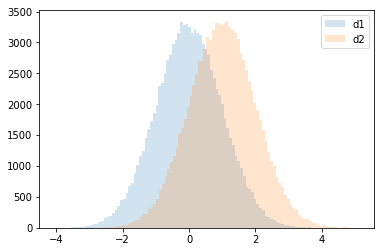

In [103]:
np.random.seed(19750908)
d1 = np.random.randn(100000)
d2 = np.random.randn(100000)+1
h1 = plt.hist(d1,bins=100,label='d1',alpha=0.2)
h2 = plt.hist(d2,bins=100,label='d2',alpha=0.2)
plt.legend()

In [116]:
## calculate the t-crit values given the empirical distribution (where d1 is the d0vsd1 comparison)
#another way, using percentiles
alpha = 0.025
pctl = 100-(alpha*100)

t_crit_pos = np.percentile(d1,pctl,interpolation='linear')
t_crit_neg = np.percentile(d1,100-pctl,interpolation='linear')

print("t-crit +/- : {0:.10f} / {1:.10f}".format(t_crit_pos,t_crit_neg))

t-crit +/- : 1.9533805569 / -1.9723691933


In [115]:
# proportion greater than a given stat
alpha = 0.025 #p-value cut-off for 2-tailed test
t_stat = np.abs(3) #np.abs(d1[1])
n_samples = len(d1)
d1_abs = np.abs(d1)
prop_greater = np.sum(d1_abs > t_stat)/n_samples #equals the prob. that a value greater than t_stat comes from this distribution
print(prop_greater)


0.00255


In [109]:
np.percentile(d1,100-pctl,interpolation='linear')

-1.9723691933056635

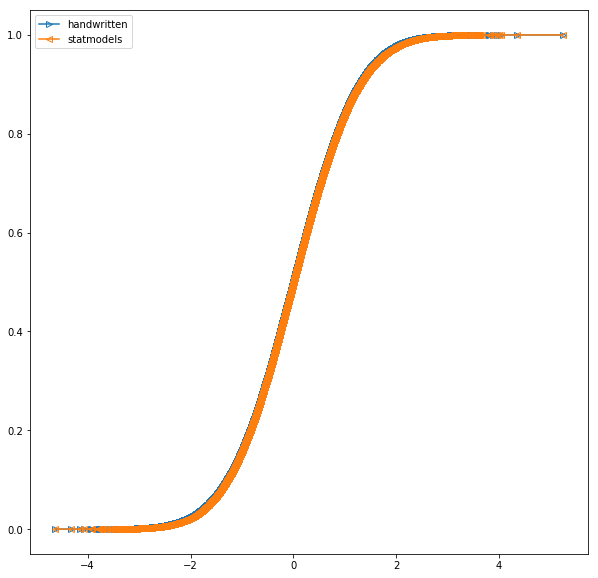

In [36]:
#https://stackoverflow.com/questions/15792552/numpy-scipy-equivalent-of-r-ecdfxx-function/15792672
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

grades = (93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,
          89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61)
grades = d1

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

plt.figure(figsize=(10,10))
xs, ys = ecdf(grades)
plt.plot(xs, ys, label="handwritten", marker=">", markerfacecolor='none')
cdf = ECDF(grades)
plt.plot(cdf.x, cdf.y, label="statmodels", marker="<", markerfacecolor='none')
plt.legend()
plt.show()

In [37]:
%timeit ECDF(grades)
%timeit ecdf(grades)

5.94 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.96 ms ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
def find_nearest(array,value):
    """ if array is sorted, scales with size"""
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [62]:
## find the proportion of 
value = -.01
print(cdf(value))
print(ys[np.where(xs==find_nearest(xs,value))[0][0]]) #

0.4953600000000001
0.49536
